***MEA***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df= pd.read_excel('/content/density12.xlsx')

In [ ]:
df

,T (K),d (g cm−3),dcor (g cm−3)
0,281.15,1.02555,1.02498
1,283.15,1.02399,1.02350
2,285.15,1.02242,1.02202
3,287.15,1.02084,1.02054
4,289.15,1.01926,1.01905
5,291.15,1.01768,1.01756
6,293.15,1.01610,1.01606
7,295.15,1.01452,1.01456
8,297.15,1.01294,1.01305
9,299.15,1.01135,1.01155


MSE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Features and target variable
X = df[['T (K)']].values
y = df['d (g cm−3)'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=8, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test_scaled, batch_size=64)
print(f"Test MSE: {np.sqrt(test_loss)}")

# Predict and inverse transform the results
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate the error percentage (MAPE)
mape = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate the error percentage for each prediction
error_percentage = np.abs((y_test_original - y_pred) / y_test_original) * 100

# Prepare a comparison DataFrame
comparison = pd.DataFrame({
    'Temperature (K)': X_test.flatten(),
    'Actual d (g cm−3)': y_test_original.flatten(),
    'Predicted d (g cm−3)': y_pred.flatten(),
    'Error Percentage (%)': error_percentage.flatten()
})

# Display the comparison table
print(comparison.to_string(index=False))

Epoch 1/100
3/3 [==============================] - 3s 161ms/step - loss: 0.9562 - val_loss: 0.2716
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.8145 - val_loss: 0.2271
Epoch 3/100
3/3 [==============================] - 0s 57ms/step - loss: 0.7015 - val_loss: 0.1875
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.5809 - val_loss: 0.1545
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.4820 - val_loss: 0.1254
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 0.4062 - val_loss: 0.1004
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 0.3286 - val_loss: 0.0792
Epoch 8/100
3/3 [==============================] - 0s 79ms/step - loss: 0.2669 - val_loss: 0.0612
Epoch 9/100
3/3 [==============================] - 0s 37ms/step - loss: 0.2166 - val_loss: 0.0461
Epoch 10/100
3/3 [==============================] - 0s 40ms/step - loss: 0.1698 - val_loss: 0.0340
Epoch 11/100
3/3 [

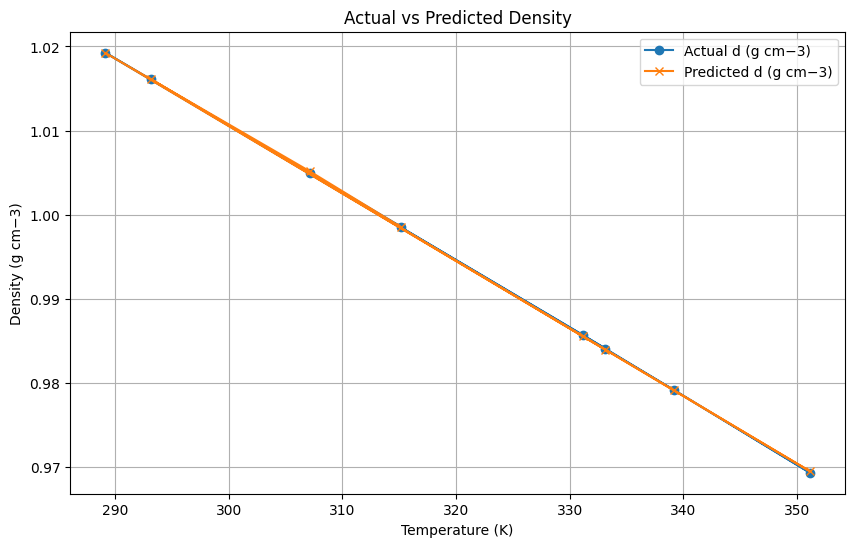

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(comparison['Temperature (K)'], comparison['Actual d (g cm−3)'], label='Actual d (g cm−3)', marker='o')
plt.plot(comparison['Temperature (K)'], comparison['Predicted d (g cm−3)'], label='Predicted d (g cm−3)', marker='x')
plt.xlabel('Temperature (K)')
plt.ylabel('Density (g cm−3)')
plt.title('Actual vs Predicted Density')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100
4/4 [==============================] - 1s 62ms/step - loss: 0.7926 - val_loss: 2.3154
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6732 - val_loss: 2.0318
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5633 - val_loss: 1.7322
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4757 - val_loss: 1.4618
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3932 - val_loss: 1.2119
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.3315 - val_loss: 0.9866
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2728 - val_loss: 0.7852
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2248 - val_loss: 0.6055
Epoch 9/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1811 - val_loss: 0.4670
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1391 - val_loss: 0.3462
Epoch 11/100
4/4 [=

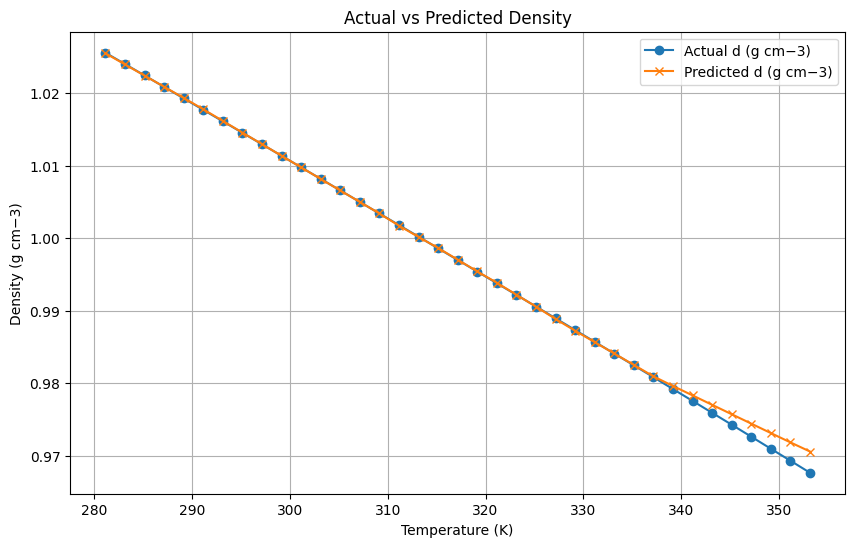

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Features and target variable
X = df[['T (K)']].values
y = df['d (g cm−3)'].values.reshape(-1, 1)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_scaled, y_scaled, epochs=100, batch_size=8, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_scaled, y_scaled, batch_size=64)
print(f"Overall MSE: {test_loss}")

# Predict and inverse transform the results
y_pred_scaled = model.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_original = scaler_y.inverse_transform(y_scaled)

# Calculate the error percentage (MAPE)
mape = np.mean(np.abs((y_original - y_pred) / y_original)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate the error percentage for each prediction
error_percentage = np.abs((y_original - y_pred) / y_original) * 100

# Compare actual and predicted values along with the error percentage
comparison = pd.DataFrame({
    'Temperature (K)': df['T (K)'],
    'Actual d (g cm−3)': y_original.flatten(),
    'Predicted d (g cm−3)': y_pred.flatten(),
    'Error Percentage (%)': error_percentage.flatten()
})

# Display the comparison table
print(comparison.to_string(index=False))

# Save the comparison DataFrame to an Excel file
comparison.to_excel('comparison_results.xlsx', index=False)

print("Comparison results saved to 'comparison_results.xlsx'")

# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(comparison['Temperature (K)'], comparison['Actual d (g cm−3)'], label='Actual d (g cm−3)', marker='o')
plt.plot(comparison['Temperature (K)'], comparison['Predicted d (g cm−3)'], label='Predicted d (g cm−3)', marker='x')
plt.xlabel('Temperature (K)')
plt.ylabel('Density (g cm−3)')
plt.title('Actual vs Predicted Density')
plt.legend()
plt.grid(True)
plt.show()

RMSE

Epoch 1/100
3/3 [==============================] - 1s 79ms/step - loss: 1.0998 - val_loss: 0.5773
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9890 - val_loss: 0.5210
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8971 - val_loss: 0.4673
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8088 - val_loss: 0.4177
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7289 - val_loss: 0.3700
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6505 - val_loss: 0.3219
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5744 - val_loss: 0.2724
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4931 - val_loss: 0.2236
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4141 - val_loss: 0.1747
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3175 - val_loss: 0.1265
Epoch 11/100
3/3 [=

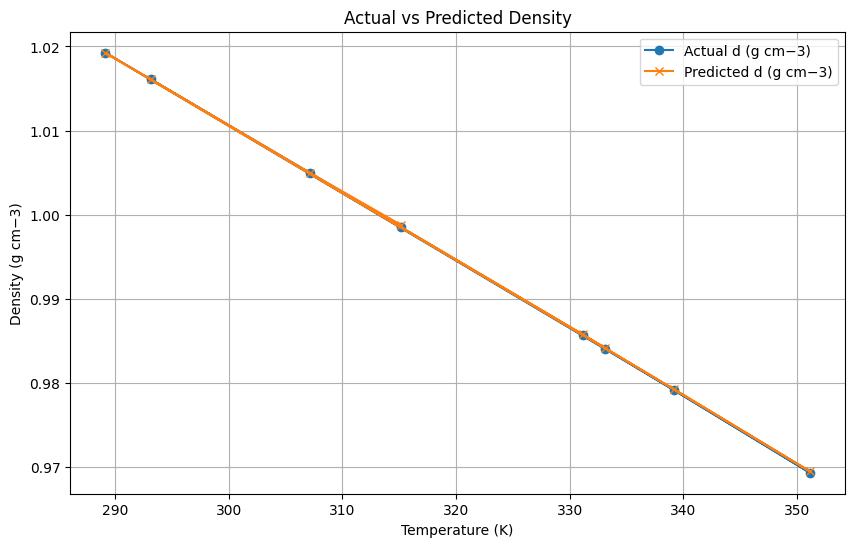

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Features and target variable
X = df[['T (K)']].values
y = df['d (g cm−3)'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Custom RMSE metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss=rmse)

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=8, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test_scaled, batch_size=64)
print(f"Test RMSE: {test_loss}")

# Predict and inverse transform the results
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate the error percentage (MAPE)
mape = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate the error percentage for each prediction
error_percentage = np.abs((y_test_original - y_pred) / y_test_original) * 100

# Prepare a comparison DataFrame
comparison = pd.DataFrame({
    'Temperature (K)': X_test.flatten(),
    'Actual d (g cm−3)': y_test_original.flatten(),
    'Predicted d (g cm−3)': y_pred.flatten(),
    'Error Percentage (%)': error_percentage.flatten()
})

# Display the comparison table
print(comparison.to_string(index=False))

# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(comparison['Temperature (K)'], comparison['Actual d (g cm−3)'], label='Actual d (g cm−3)', marker='o')
plt.plot(comparison['Temperature (K)'], comparison['Predicted d (g cm−3)'], label='Predicted d (g cm−3)', marker='x')
plt.xlabel('Temperature (K)')
plt.ylabel('Density (g cm−3)')
plt.title('Actual vs Predicted Density')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100
4/4 [==============================] - 1s 98ms/step - loss: 0.9494 - val_loss: 1.5170
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8545 - val_loss: 1.4534
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7887 - val_loss: 1.4022
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 0.6637 - val_loss: 1.3605
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6110 - val_loss: 1.3254
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5825 - val_loss: 1.2929
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.5267 - val_loss: 1.2561
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.4598 - val_loss: 1.2017
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.3978 - val_loss: 1.1355
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.3390 - val_loss: 1.0627
Epoch 11/100
4/4 [=

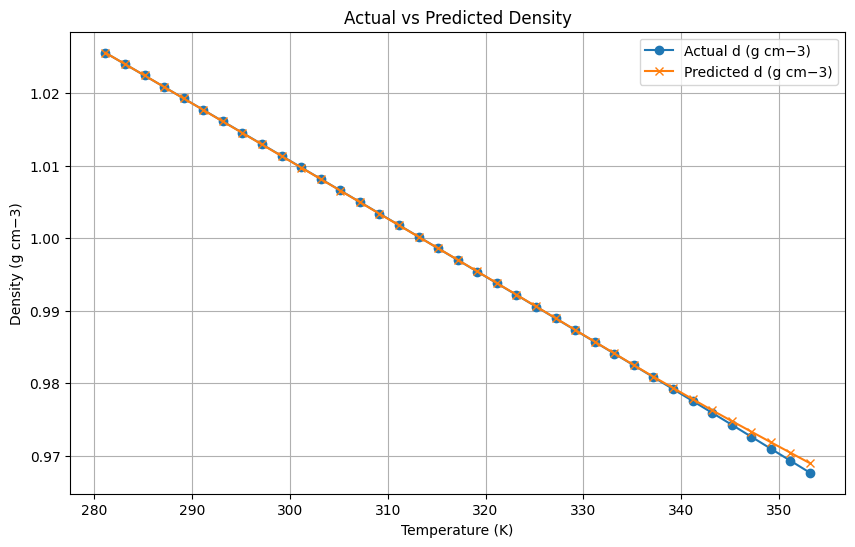

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Features and target variable
X = df[['T (K)']].values
y = df['d (g cm−3)'].values.reshape(-1, 1)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Custom RMSE metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss=rmse)

# Train the model
model.fit(X_scaled, y_scaled, epochs=100, batch_size=8, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_scaled, y_scaled, batch_size=64)
print(f"Overall RMSE: {test_loss}")

# Predict and inverse transform the results
y_pred_scaled = model.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_original = scaler_y.inverse_transform(y_scaled)

# Calculate the error percentage for each prediction
error_percentage = np.abs((y_original - y_pred) / y_original) * 100

# Compare actual and predicted values along with the error percentage
comparison = pd.DataFrame({
    'Temperature (K)': df['T (K)'],
    'Actual d (g cm−3)': y_original.flatten(),
    'Predicted d (g cm−3)': y_pred.flatten(),
    'Error Percentage (%)': error_percentage.flatten()
})

# Display the comparison table
print(comparison.to_string(index=False))

# Save the comparison DataFrame to an Excel file
comparison.to_excel('comparison_results.xlsx', index=False)

print("Comparison results saved to 'comparison_results.xlsx'")

# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(comparison['Temperature (K)'], comparison['Actual d (g cm−3)'], label='Actual d (g cm−3)', marker='o')
plt.plot(comparison['Temperature (K)'], comparison['Predicted d (g cm−3)'], label='Predicted d (g cm−3)', marker='x')
plt.xlabel('Temperature (K)')
plt.ylabel('Density (g cm−3)')
plt.title('Actual vs Predicted Density')
plt.legend()
plt.grid(True)
plt.show()

**MeOH**

In [ ]:
df1= pd.read_excel('/content/density13.xlsx')

In [ ]:
df1

,T (K),d (g cm−3),dcor (g cm−3)
0,283.15,0.80067,0.80373
1,288.15,0.79599,0.79906
2,293.15,0.79129,0.79435
3,298.15,0.78658,0.78958
4,303.15,0.78186,0.78476
5,308.15,0.77710,0.77988
6,313.15,0.77232,0.77494
7,318.15,0.76752,0.76994
8,323.15,0.76267,0.76487
9,328.15,0.75777,0.75974


In [ ]:
# Separate features and target variable
X = df1[['T (K)']]
y = df1['d (g cm−3)']

Epoch 1/100
1/1 [==============================] - 1s 855ms/step - loss: 1.2274 - val_loss: 0.7209
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 1.2002 - val_loss: 0.7037
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 1.1732 - val_loss: 0.6868
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 1.1469 - val_loss: 0.6700
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 1.1210 - val_loss: 0.6534
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 1.0952 - val_loss: 0.6369
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 1.0695 - val_loss: 0.6206
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 1.0440 - val_loss: 0.6044
Epoch 9/100
1/1 [==============================] - 0s 69ms/step - loss: 1.0185 - val_loss: 0.5886
Epoch 10/100
1/1 [==============================] - 0s 45ms/step - loss: 0.9930 - val_loss: 0.5731
Epoch 11/100
1/1 [

Test RMSE: 0.0818605124950409
1/1 [==============================] - 0s 71ms/step
Mean Absolute Percentage Error (MAPE): 0.12%
 Temperature (K)  Actual d (g cm−3)  Predicted d (g cm−3)  Error Percentage (%)
          308.15            0.77710              0.778567              0.188812
          283.15            0.80067              0.799324              0.168112
          328.15            0.75777              0.757815              0.005994


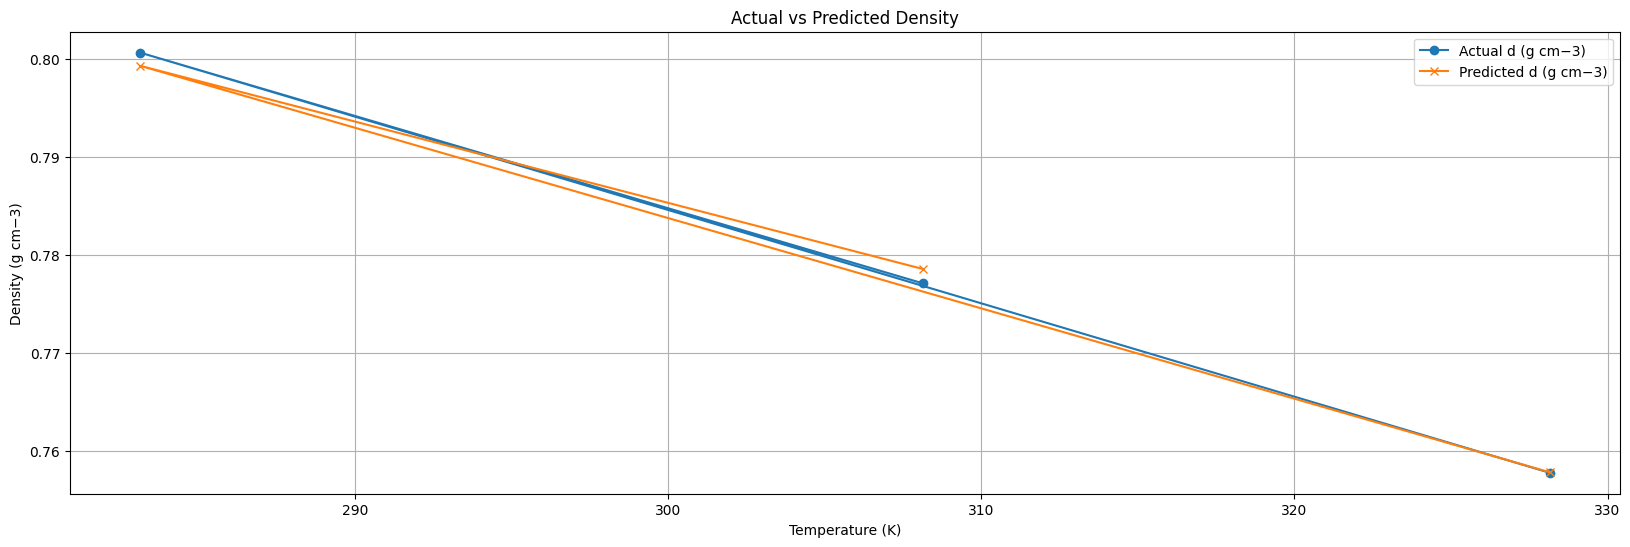

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Features and target variable
X = df1[['T (K)']].values
y = df1['d (g cm−3)'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Custom RMSE metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss=rmse)

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=8, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test_scaled, batch_size=64)
print(f"Test RMSE: {test_loss}")

# Predict and inverse transform the results
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate the error percentage (MAPE)
mape = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate the error percentage for each prediction
error_percentage = np.abs((y_test_original - y_pred) / y_test_original) * 100

# Prepare a comparison DataFrame
comparison = pd.DataFrame({
    'Temperature (K)': X_test.flatten(),
    'Actual d (g cm−3)': y_test_original.flatten(),
    'Predicted d (g cm−3)': y_pred.flatten(),
    'Error Percentage (%)': error_percentage.flatten()
})

# Display the comparison table
print(comparison.to_string(index=False))
# Plot actual vs predicted values for the test set
plt.figure(figsize=(20, 6))
plt.plot(comparison['Temperature (K)'], comparison['Actual d (g cm−3)'], label='Actual d (g cm−3)', marker='o')
plt.plot(comparison['Temperature (K)'], comparison['Predicted d (g cm−3)'], label='Predicted d (g cm−3)', marker='x')
plt.xlabel('Temperature (K)')
plt.ylabel('Density (g cm−3)')
plt.title('Actual vs Predicted Density')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.8520 - val_loss: 1.1870
Epoch 2/100
1/1 [==============================] - 0s 91ms/step - loss: 0.8319 - val_loss: 1.1640
Epoch 3/100
1/1 [==============================] - 0s 105ms/step - loss: 0.8132 - val_loss: 1.1407
Epoch 4/100
1/1 [==============================] - 0s 125ms/step - loss: 0.7952 - val_loss: 1.1171
Epoch 5/100
1/1 [==============================] - 0s 155ms/step - loss: 0.7769 - val_loss: 1.0933
Epoch 6/100
1/1 [==============================] - 0s 145ms/step - loss: 0.7585 - val_loss: 1.0696
Epoch 7/100
1/1 [==============================] - 0s 129ms/step - loss: 0.7405 - val_loss: 1.0471
Epoch 8/100
1/1 [==============================] - 0s 106ms/step - loss: 0.7225 - val_loss: 1.0257
Epoch 9/100
1/1 [==============================] - 0s 112ms/step - loss: 0.7046 - val_loss: 1.0041
Epoch 10/100
1/1 [==============================] - 0s 146ms/step - loss: 0.6873 - val_loss: 0.9822
Epoch 11/100


1/1 [==============================] - 0s 108ms/step
 Temperature (K)  Actual d (g cm−3)  Predicted d (g cm−3)  Error Percentage (%)
          283.15            0.80067              0.800641              0.003681
          288.15            0.79599              0.796025              0.004432
          293.15            0.79129              0.791338              0.006017
          298.15            0.78658              0.786623              0.005452
          303.15            0.78186              0.781898              0.004825
          308.15            0.77710              0.777075              0.003187
          313.15            0.77232              0.772366              0.005993
          318.15            0.76752              0.767532              0.001586
          323.15            0.76267              0.762924              0.033244
          328.15            0.75777              0.758372              0.079437
          333.15            0.75283              0.753865          

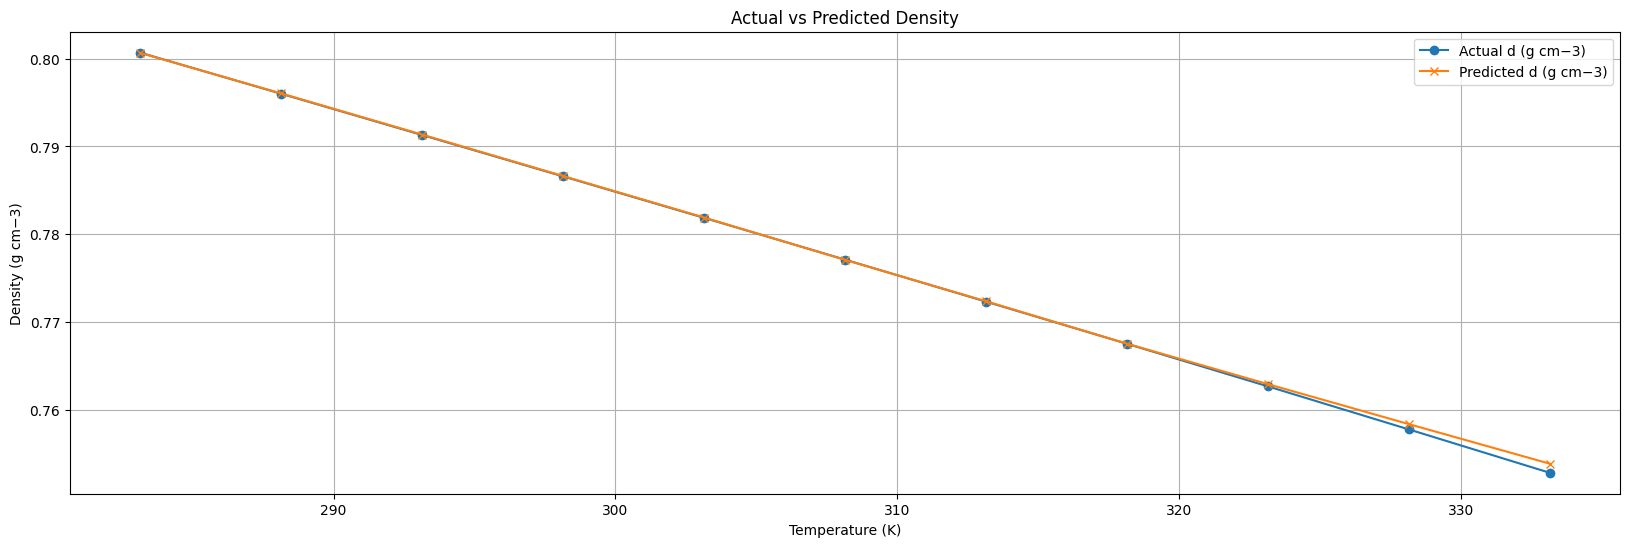

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Features and target variable
X = df1[['T (K)']].values
y = df1['d (g cm−3)'].values.reshape(-1, 1)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Custom RMSE metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss=rmse)

# Train the model
model.fit(X_scaled, y_scaled, epochs=100, batch_size=8, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_scaled, y_scaled, batch_size=64)
print(f"Overall RMSE: {test_loss}")

# Predict and inverse transform the results
y_pred_scaled = model.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_original = scaler_y.inverse_transform(y_scaled)

# Calculate the error percentage for each prediction
error_percentage = np.abs((y_original - y_pred) / y_original) * 100

# Compare actual and predicted values along with the error percentage
comparison = pd.DataFrame({
    'Temperature (K)': df1['T (K)'],
    'Actual d (g cm−3)': y_original.flatten(),
    'Predicted d (g cm−3)': y_pred.flatten(),
    'Error Percentage (%)': error_percentage.flatten()
})

# Display the comparison table
print(comparison.to_string(index=False))

# Save the comparison DataFrame to an Excel file
comparison.to_excel('comparison_results.xlsx', index=False)

print("Comparison results saved to 'comparison_results.xlsx'")

# Plot actual vs predicted values for the test set
plt.figure(figsize=(20, 6))
plt.plot(comparison['Temperature (K)'], comparison['Actual d (g cm−3)'], label='Actual d (g cm−3)', marker='o')
plt.plot(comparison['Temperature (K)'], comparison['Predicted d (g cm−3)'], label='Predicted d (g cm−3)', marker='x')
plt.xlabel('Temperature (K)')
plt.ylabel('Density (g cm−3)')
plt.title('Actual vs Predicted Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install pydot graphviz

Epoch 1/100
4/4 [==============================] - 3s 101ms/step - loss: 0.8057 - val_loss: 1.0723
Epoch 2/100
4/4 [==============================] - 0s 29ms/step - loss: 0.7243 - val_loss: 0.9525
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6908 - val_loss: 0.8140
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 0.6556 - val_loss: 0.6841
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 0.6306 - val_loss: 0.5620
Epoch 6/100
4/4 [==============================] - 0s 47ms/step - loss: 0.5539 - val_loss: 0.4442
Epoch 7/100
4/4 [==============================] - 0s 24ms/step - loss: 0.5020 - val_loss: 0.3279
Epoch 8/100
4/4 [==============================] - 0s 24ms/step - loss: 0.4790 - val_loss: 0.2209
Epoch 9/100
4/4 [==============================] - 0s 28ms/step - loss: 0.4309 - val_loss: 0.1388
Epoch 10/100
4/4 [==============================] - 0s 40ms/step - loss: 0.3756 - val_loss: 0.0805
Epoch 11/100
4/4 [

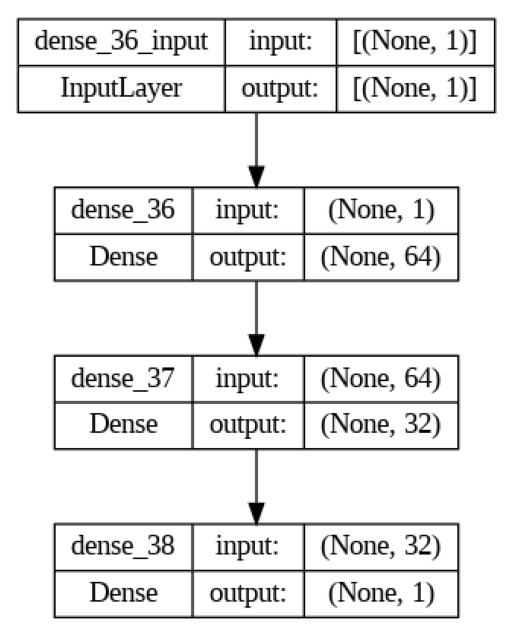

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Assuming df is already defined and contains your data

# Features and target variable
X = df[['T (K)']].values
y = df['d (g cm−3)'].values.reshape(-1, 1)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Custom RMSE metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss=rmse)

# Train the model
model.fit(X_scaled, y_scaled, epochs=100, batch_size=8, validation_split=0.2)

# Plot the model architecture
# Remove the layer_colors argument since it's causing the error
plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # Top to Bottom
    dpi=96
)

# Display the model architecture
from IPython.display import Image
Image(filename='model_architecture.png')

# Alternative: Plot using matplotlib
plt.figure(figsize=(12, 8))
img = plt.imread('model_architecture.png')
plt.imshow(img)
plt.axis('off')
plt.show()

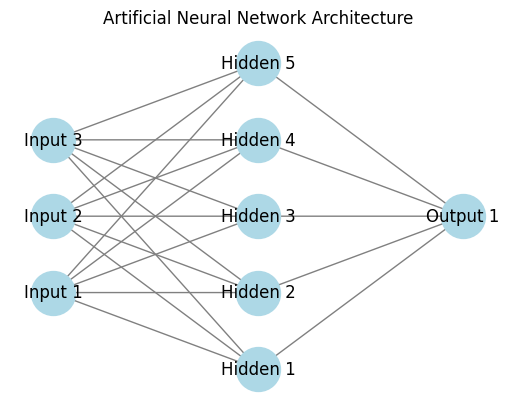

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the number of nodes in each layer
input_layer = 3  # Number of input features
hidden_layer = 5  # Number of nodes in the hidden layer
output_layer = 1  # Number of output nodes

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each layer
for i in range(input_layer):
    G.add_node(f'Input {i+1}')

for i in range(hidden_layer):
    G.add_node(f'Hidden {i+1}')

for i in range(output_layer):
    G.add_node(f'Output {i+1}')

# Add edges between layers
for i in range(input_layer):
    for j in range(hidden_layer):
        G.add_edge(f'Input {i+1}', f'Hidden {j+1}')

for j in range(hidden_layer):
    for k in range(output_layer):
        G.add_edge(f'Hidden {j+1}', f'Output {k+1}')

# Calculate node subsets based on their names
node_subsets = {}
for node in G.nodes():
    if 'Input' in node:
        node_subsets.setdefault(0, []).append(node)  # Group input nodes under subset 0
    elif 'Hidden' in node:
        node_subsets.setdefault(1, []).append(node)  # Group hidden nodes under subset 1
    elif 'Output' in node:
        node_subsets.setdefault(2, []).append(node)  # Group output nodes under subset 2

# Draw the graph using the calculated subsets
pos = nx.multipartite_layout(G, subset_key=node_subsets)  # Pass the dictionary of subsets
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.title('Artificial Neural Network Architecture')
plt.axis('off')
plt.show()

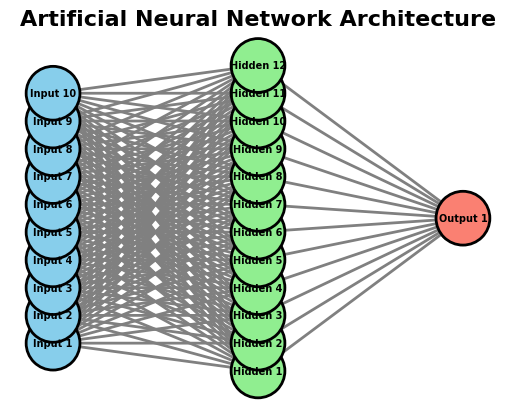

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the number of nodes in each layer
input_layer = 10  # Number of input features
hidden_layer = 12  # Number of nodes in the hidden layer
output_layer = 1  # Number of output nodes

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each layer
for i in range(input_layer):
    G.add_node(f'Input {i+1}')

for i in range(hidden_layer):
    G.add_node(f'Hidden {i+1}')

for i in range(output_layer):
    G.add_node(f'Output {i+1}')

# Add edges between layers
for i in range(input_layer):
    for j in range(hidden_layer):
        G.add_edge(f'Input {i+1}', f'Hidden {j+1}')

for j in range(hidden_layer):
    for k in range(output_layer):
        G.add_edge(f'Hidden {j+1}', f'Output {k+1}')

# Calculate node subsets based on their names
node_subsets = {}
for node in G.nodes():
    if 'Input' in node:
        node_subsets.setdefault(0, []).append(node)  # Group input nodes under subset 0
    elif 'Hidden' in node:
        node_subsets.setdefault(1, []).append(node)  # Group hidden nodes under subset 1
    elif 'Output' in node:
        node_subsets.setdefault(2, []).append(node)  # Group output nodes under subset 2

# Draw the graph using the calculated subsets
pos = nx.multipartite_layout(G, subset_key=node_subsets)  # Pass the dictionary of subsets

# Customize node colors
node_colors = []
for node in G.nodes():
    if 'Input' in node:
        node_colors.append('skyblue')
    elif 'Hidden' in node:
        node_colors.append('lightgreen')
    elif 'Output' in node:
        node_colors.append('salmon')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, edgecolors='black', linewidths=2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=7, font_family='sans-serif', font_weight='bold')

# Draw edges with customized styles
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=20, width=2)

# Add a background grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Set title
plt.title('Artificial Neural Network Architecture', fontsize=16, fontweight='bold')

# Remove axis
plt.axis('off')

# Show plot
plt.show()
